In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

from tslearn.barycenters import (dtw_barycenter_averaging,
                                 dtw_barycenter_averaging_subgradient,
                                 euclidean_barycenter, softdtw_barycenter)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.metrics import dtw, soft_dtw
from tslearn.preprocessing import (TimeSeriesResampler,
                                   TimeSeriesScalerMeanVariance)
from xgboost import XGBClassifier

In [2]:
def concat_two_df_and_drop_same_column_in_df2(DF1, DF2):
    display(DF1.head(1))
    display(DF2.head(1))
    DF2.drop(DF2.columns[DF2.columns.isin(DF1.columns)],axis=1,inplace=True)
#     DF1.drop(DF1.columns[DF1.columns.isin(DF2.columns)],axis=1,inplace=True)
    result = pd.concat([DF1, DF2], axis=1)
    display(result.head(1))
    return result
def plot_feature(dataframe, feature, qty_ratio=1, fdi_top = True):
    plt.figure(dpi=150, figsize=(15,4))
    rng = int(dataframe[ dataframe['FDI']==True ][feature].count()*qty_ratio)
    print(rng)
    x = np.arange(0,rng)
    if fdi_top:
        plt.scatter(x, dataframe[ dataframe['FDI']==False ][feature].to_numpy()[:rng], s=1, c='b', alpha=0.1)
        plt.scatter(x, dataframe[ dataframe['FDI']==True ][feature].to_numpy()[:rng], s=1, c='r', alpha=0.1)
    else:
        plt.scatter(x, dataframe[ dataframe['FDI']==True ][feature].to_numpy()[:rng], s=1, c='r', alpha=0.1)
        plt.scatter(x, dataframe[ dataframe['FDI']==False ][feature].to_numpy()[:rng], s=1, c='b', alpha=0.1)

In [3]:
four_time = pd.read_csv("CSV/four_time.csv")
v_value = pd.read_csv("CSV/v_value.csv")
mic = pd.read_csv("CSV/mic.csv")
dwt_distance = pd.read_csv("CSV/sdtw_day_score_df.csv")
smart_meter = pd.read_csv("smart_meter.csv")

In [4]:
fdi = pd.read_csv("CSV/FDI.csv")

In [5]:
four_time.shape, v_value.shape, mic.shape, dwt_distance.shape, fdi.shape, smart_meter.shape

((2239250, 7),
 (2239250, 9),
 (2239250, 4),
 (2239250, 5),
 (2239250, 3),
 (107484000, 5))

In [6]:
result = concat_two_df_and_drop_same_column_in_df2(fdi, v_value)
result = concat_two_df_and_drop_same_column_in_df2(result, four_time)
result = concat_two_df_and_drop_same_column_in_df2(result, mic)
result = concat_two_df_and_drop_same_column_in_df2(result, dwt_distance)
result.columns

,MeterID,Day,FDI
0,1236,2009-07-15,1.0


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1
0,5212,2010-12-31,True,12,30,15,0.046464,0.047532,0.013561


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561


,MeterID,Day,FDI,overnight,breakfast,daytime,evening
0,1236,2009-07-15,True,5.380015,15.5,24.5,38.0


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0


,MeterID,Day,FDI,mic
0,1236,2009-07-15,True,0.624128


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening,mic
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0,0.624128


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening,mic
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0,0.624128


,MeterID,Day,FDI,meter_dtw,meter_sdtw
0,1236,2009-07-15,True,2.283294,-68.276715


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening,mic,meter_dtw,meter_sdtw
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0,0.624128,2.283294,-68.276715


Index(['MeterID', 'Day', 'FDI', 'Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2',
       'Cmin1', 'overnight', 'breakfast', 'daytime', 'evening', 'mic',
       'meter_dtw', 'meter_sdtw'],
      dtype='object')

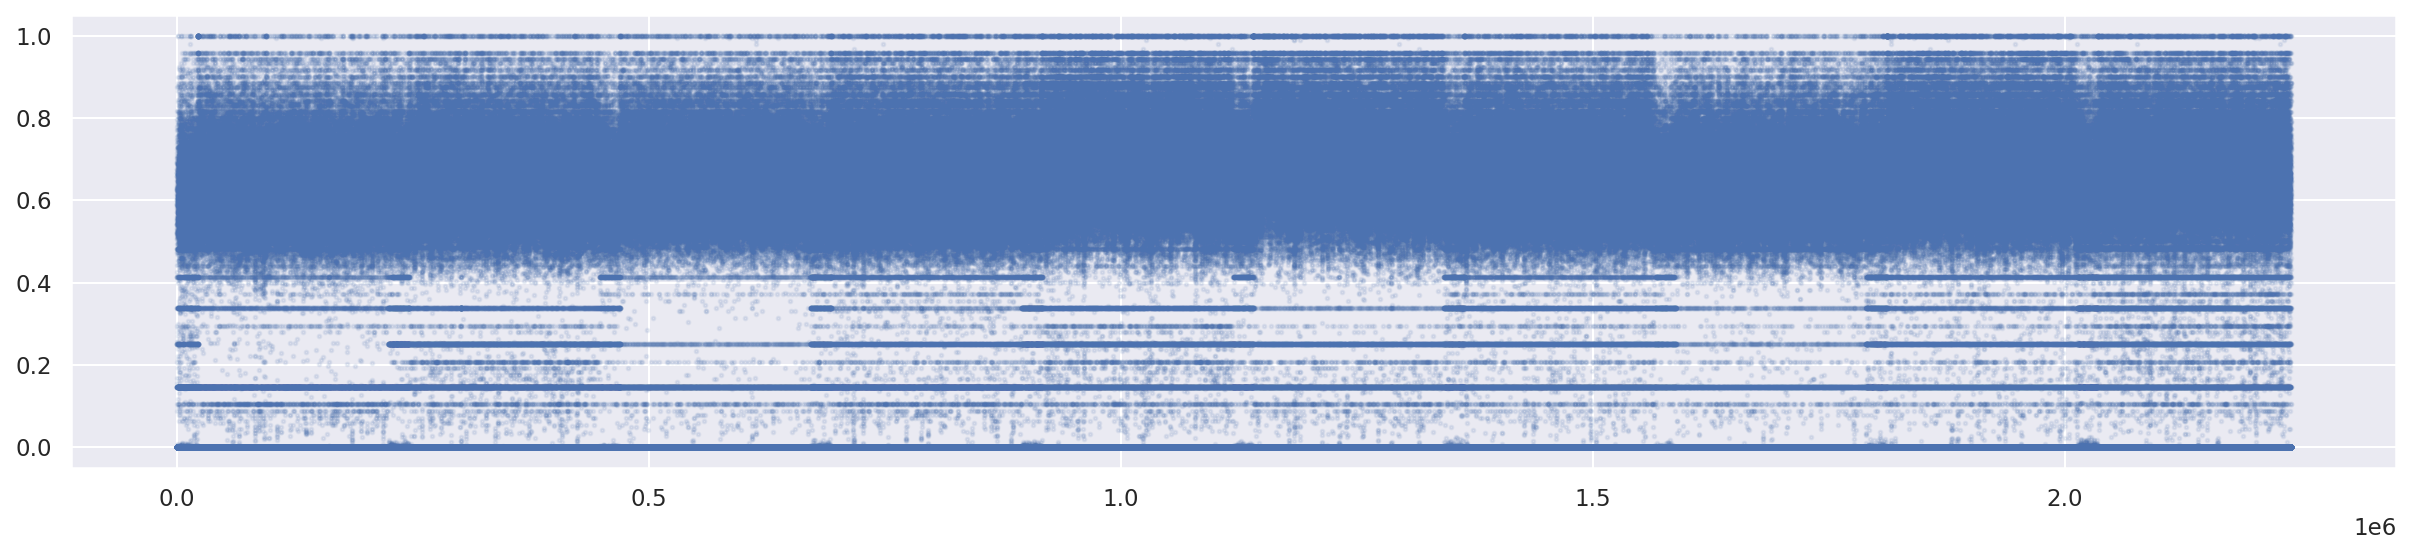

In [7]:
plt.figure(dpi=150, figsize=(20,4))
total_count = result['mic'].shape[0]
plt.scatter(np.arange(0, total_count), result['mic'],s=3, c='b', alpha=0.1)

In [22]:
fdi_count + area_count

233730

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


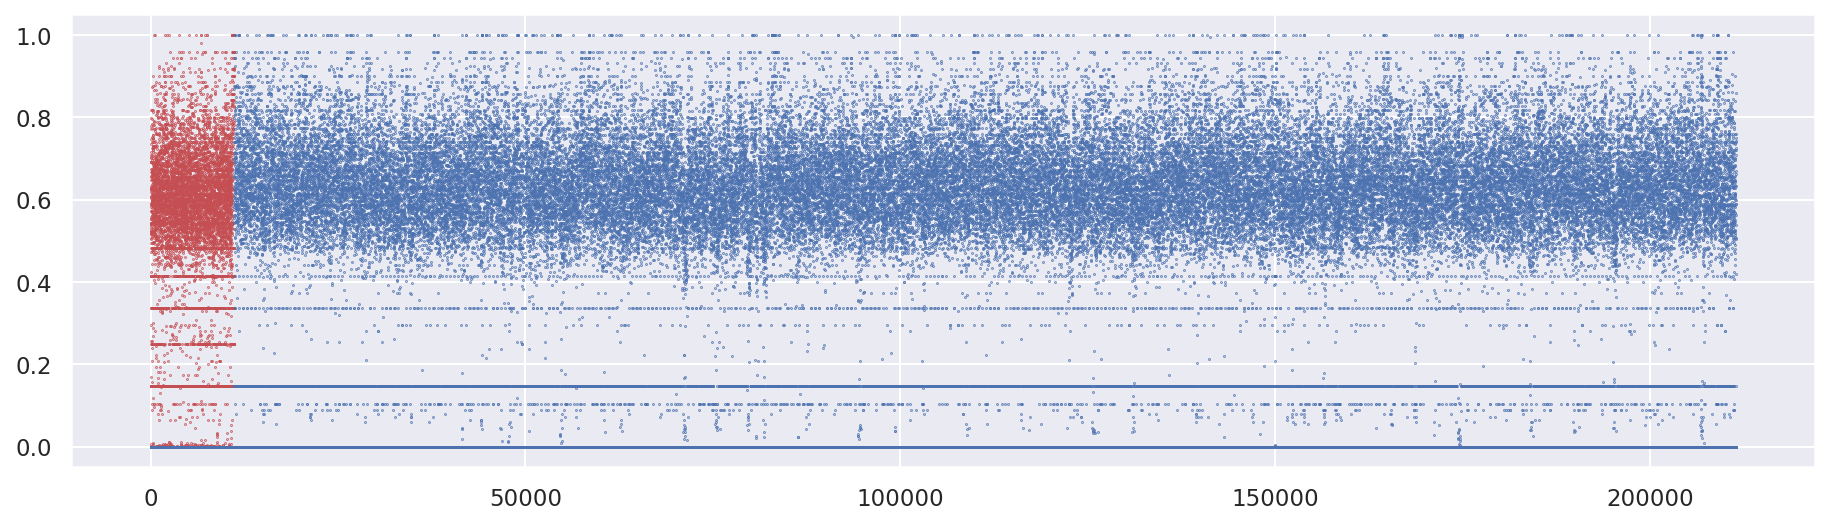

In [35]:
plt.figure(dpi=150, figsize=(15,4))
fdi_count = result.iloc[:530*200][ result['FDI']==1 ]['mic'].count()
normal_count = 530*420 - fdi_count
plt.scatter(np.arange(0, fdi_count) , result[ result['FDI']==1 ]['mic'].reset_index()['mic'].iloc[:fdi_count] , s=.1, c='r')
plt.scatter(np.arange(0, normal_count) , result[ result['FDI']==0 ]['mic'].reset_index()['mic'].iloc[:normal_count] , s=.1, c='b')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


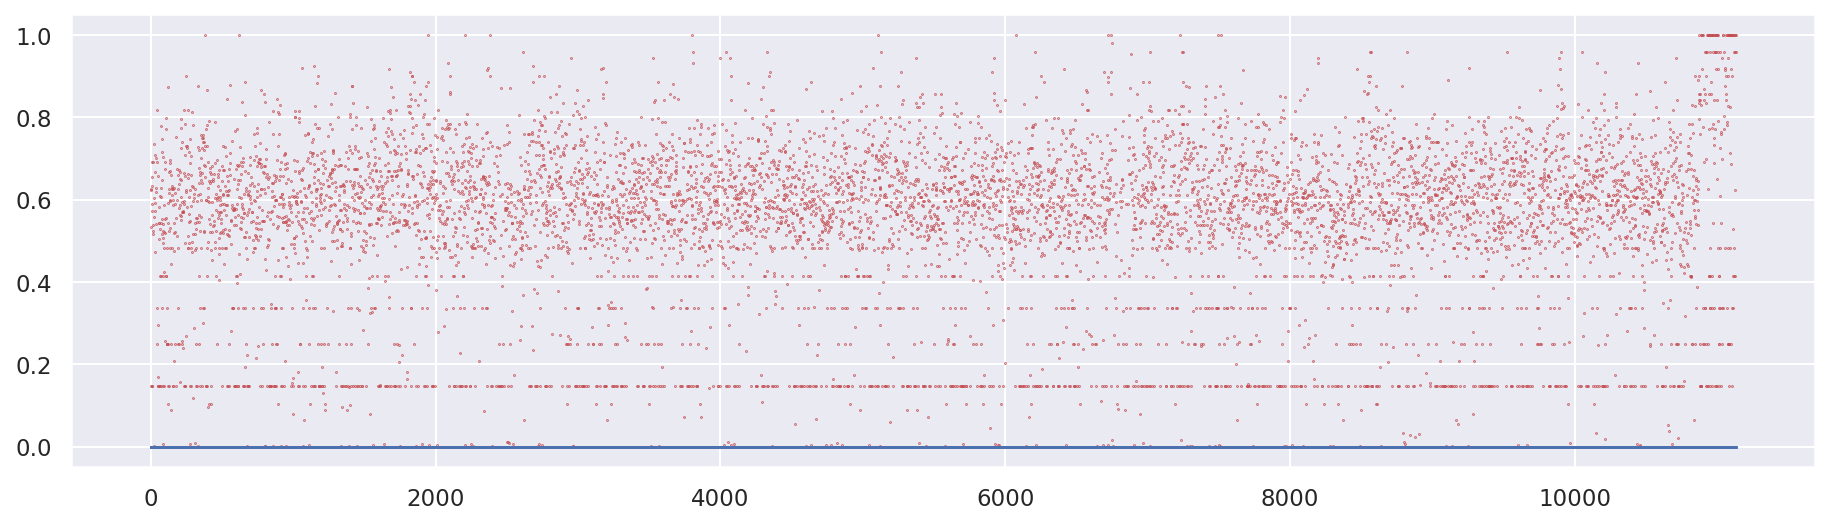

In [36]:
plt.figure(dpi=150, figsize=(15,4))
fdi_count = result.iloc[:530*200][ result['FDI']==1 ]['mic'].count()
normal_count = 530*420 - fdi_count
plt.scatter(np.arange(0, fdi_count) , result[ result['FDI']==1 ]['mic'].reset_index()['mic'].iloc[:fdi_count] , s=.1, c='r')
plt.scatter(np.arange(0, fdi_count) , result[ result['FDI']==0 ]['mic'].reset_index()['mic'].iloc[:fdi_count] , s=.1, c='b')

## barycenter

In [45]:
barycenter = pd.read_csv("CSV/one_cluster_sdtw_barycenter_48.csv")

In [97]:
barycenter.loc[0].count()/530

48.0

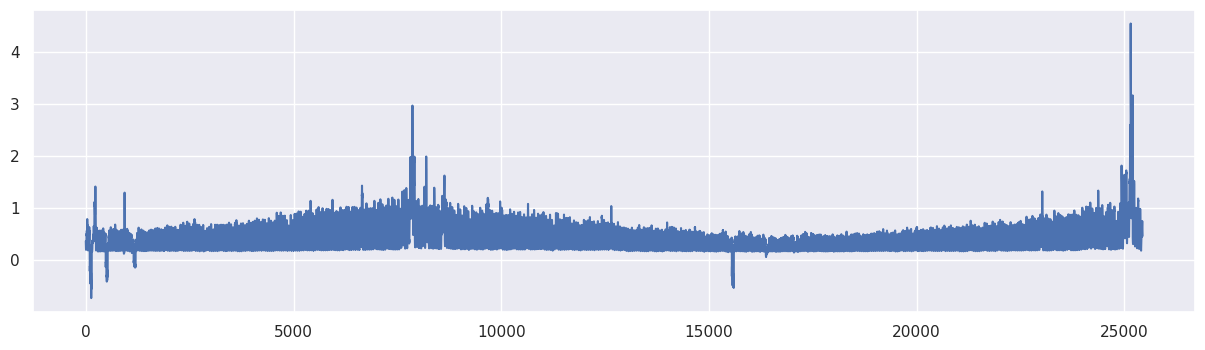

In [58]:
plt.figure(dpi=100, figsize=(15,4))
plt.plot(list(barycenter.loc[0]))

In [62]:
barycenter.loc[0][ barycenter.loc[0] < 0 ]

96      -0.207255
97      -0.132741
98      -0.122055
99      -0.112960
100     -0.120511
           ...   
15595   -0.282098
15596   -0.391608
15597   -0.529109
15598   -0.470165
15599   -0.411454
Name: 0, Length: 191, dtype: float64

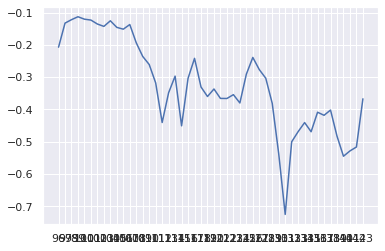

In [81]:
plt.plot(barycenter.loc[0][96:96+48])

In [68]:
bary_every_day = barycenter.loc[0].to_numpy().reshape(-1, 48)
df = pd.DataFrame(bary_every_day)

In [76]:
x = smart_meter[smart_meter["Day"] == '2009-07-17']['Electricity'].to_numpy().reshape(-1, 48)

In [85]:
x2 = smart_meter[smart_meter["Day"] == '2009-07-17']['Electricity'].to_numpy()[:422*48].reshape(-1,48)

In [95]:
x.shape, x2.shape

((4225, 48), (422, 48))

In [79]:
result = softdtw_barycenter(x, max_iter=5, gamma=1.)

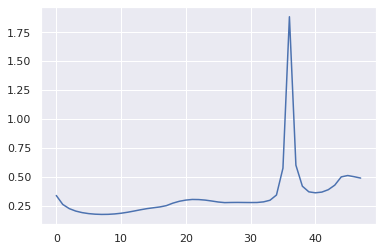

In [80]:
plt.plot(result)

In [86]:
result2 = softdtw_barycenter(x2, max_iter=5, gamma=1.)

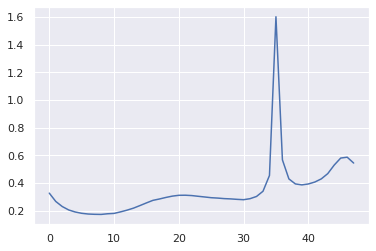

In [87]:
plt.plot(result2)

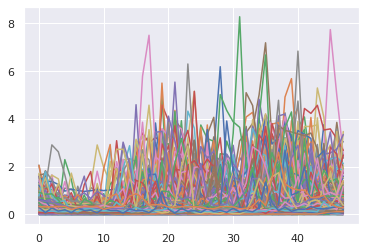

In [88]:
for i in range(len(x2)):
    plt.plot(x2[i])

In [91]:
result3 = dtw_barycenter_averaging_subgradient(x2, max_iter=5, tol=1e-3)

/opt/conda/lib/python3.7/site-packages/tslearn/barycenters/dba.py:736: ConvergenceWarning: DBA loss is increasing while it should not be. Stopping optimization.
  "Stopping optimization.", ConvergenceWarning)


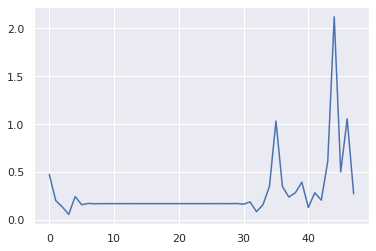

In [92]:
plt.plot(result3)

<AxesSubplot:>

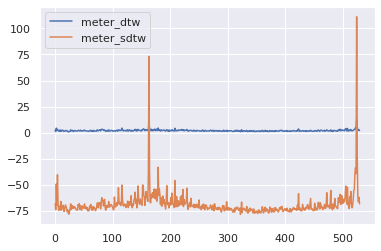

In [43]:
dwt_distance[:530].plot()